<h1 align='center' style='color:purple'>Machine Learning model fitting</h1>

<h1 align='center' style='color:Blue'> Predicting Car Price Based on various features</h1>

<h2 align='left' style='color:Black'>Importing Necessary Modules</h2>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


<h2 style='color:black'>Data Call</h2>

In [3]:
#importing dataset
df=pd.read_csv('CarPrice_Assignment.csv')

In [4]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Predicting the price of cars based on a wide range of attributes or features.Using dataset containing details of car such as safetyratings,enginetype,fueltype etc we aim to develop a machine learning model that accurately estimates the price of cars.

## Data Preprocessing

In [5]:
df.info()
#provides column nsmes,corresponding non null value count and their dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No null values are present in any of the column

In [7]:
#checking the unique value count
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [8]:
#column drop
df.drop('car_ID',axis=1,inplace=True)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [9]:
#checking various categories present in different categorical columns
#categorical_columns=df.select_dtypes(include=['object']).columns
categorical_columns=['fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem']
     

In [10]:
for column in categorical_columns:
    unique_values=df[column].unique()
    print(f"\nUnique Values for {column}:")
    print(unique_values)



Unique Values for fueltype:
['gas' 'diesel']

Unique Values for aspiration:
['std' 'turbo']

Unique Values for doornumber:
['two' 'four']

Unique Values for carbody:
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

Unique Values for drivewheel:
['rwd' 'fwd' '4wd']

Unique Values for enginelocation:
['front' 'rear']

Unique Values for enginetype:
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

Unique Values for cylindernumber:
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

Unique Values for fuelsystem:
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [11]:
#checking duplicates
df.duplicated().sum()

0

No Duplicates

In [12]:
#check statistics of dataset
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
#Splitting company name from CarName column
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.head()

,symboling,CarName,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There seems to be some spelling error in the CompanyName column.

In [15]:
df.CompanyName=df.CompanyName.str.lower()
def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [16]:
#visualizing the relationship between two continuous variables or between a continuous variable and a categorical variable

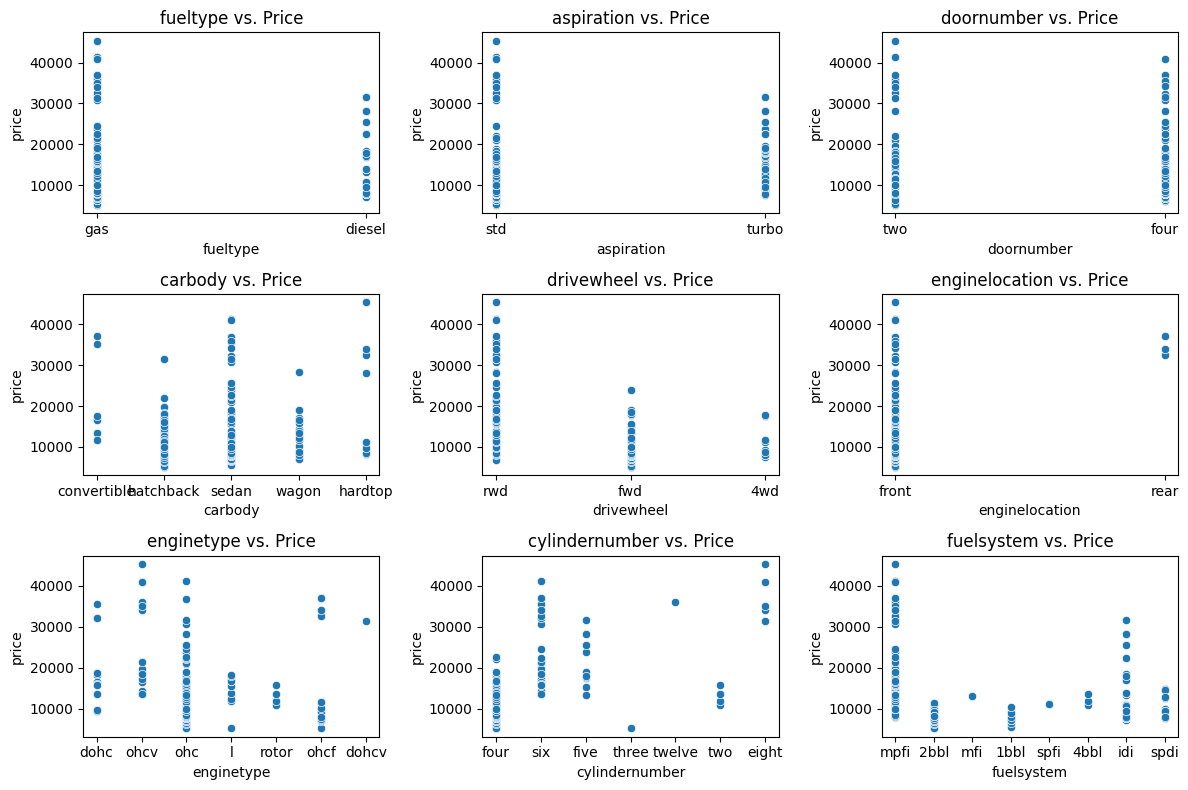

In [17]:
plt.figure(figsize=(12, 8))

# Convert Index object to a list
categorical_columns_list = list(categorical_columns)

for feature in categorical_columns_list:
    plt.subplot(3, 3, categorical_columns_list.index(feature) + 1)
    sns.scatterplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')

plt.tight_layout()
plt.show()

In [18]:
#comparing the distribution of a continuous variable(price)  across different categories of a categorical variable.

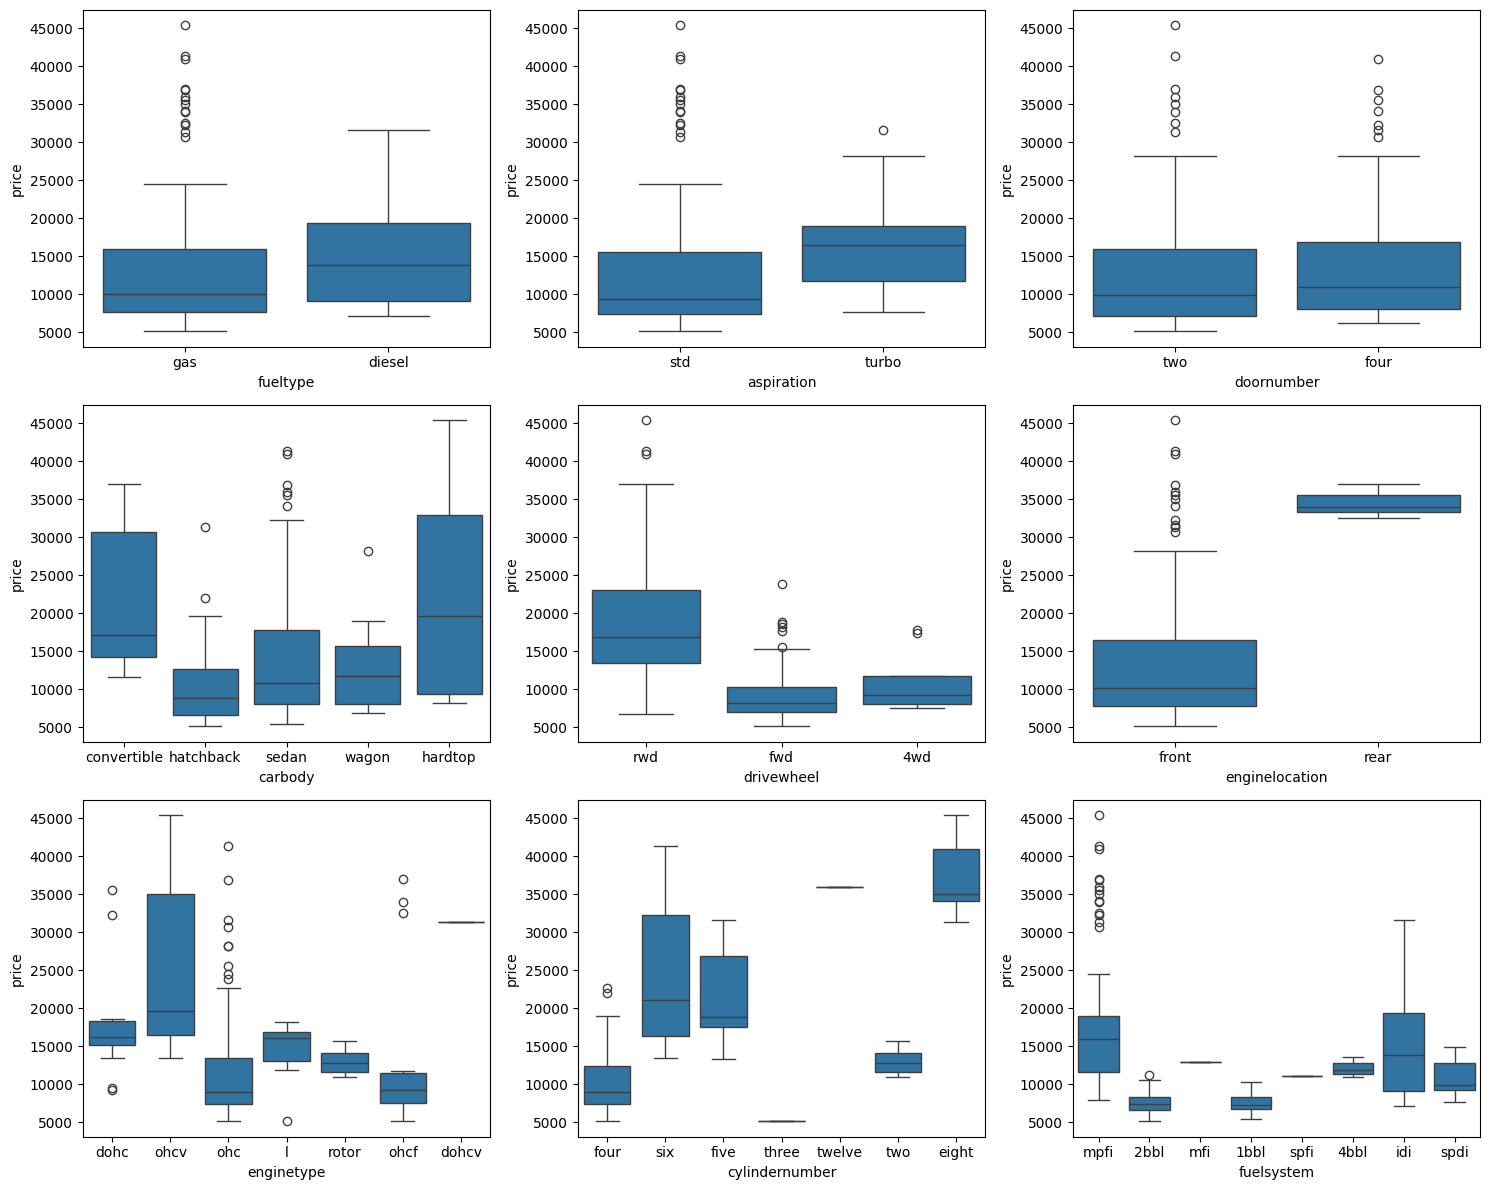

In [19]:
plt.figure(figsize=(15, 12))  # Adjust the figure size as needed

num_rows = (len(categorical_columns) + 2) // 3  # Calculate the number of rows needed
num_cols = min(len(categorical_columns), 3)   # Set the number of columns to 3 or less


for i, feature in enumerate(categorical_columns): #We loop through each categorical column (feature) in the categorical_columns list using enumerate() to get both the index and the value.
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=df, x=feature, y='price')
plt.tight_layout()
plt.show()

1. Most use car working in gas , and the average price is less than the car working in diesel.
2. The most common engine type is "ohc," correlating with lower prices.
3. Majority of users opt for [Front-Wheel Drive (fwd)]> for their cars, possibly due to its lower price.
4. Most people prefer the Sedan car type, while higher-priced types like Convertible and Hardtop are also popular choices.
   

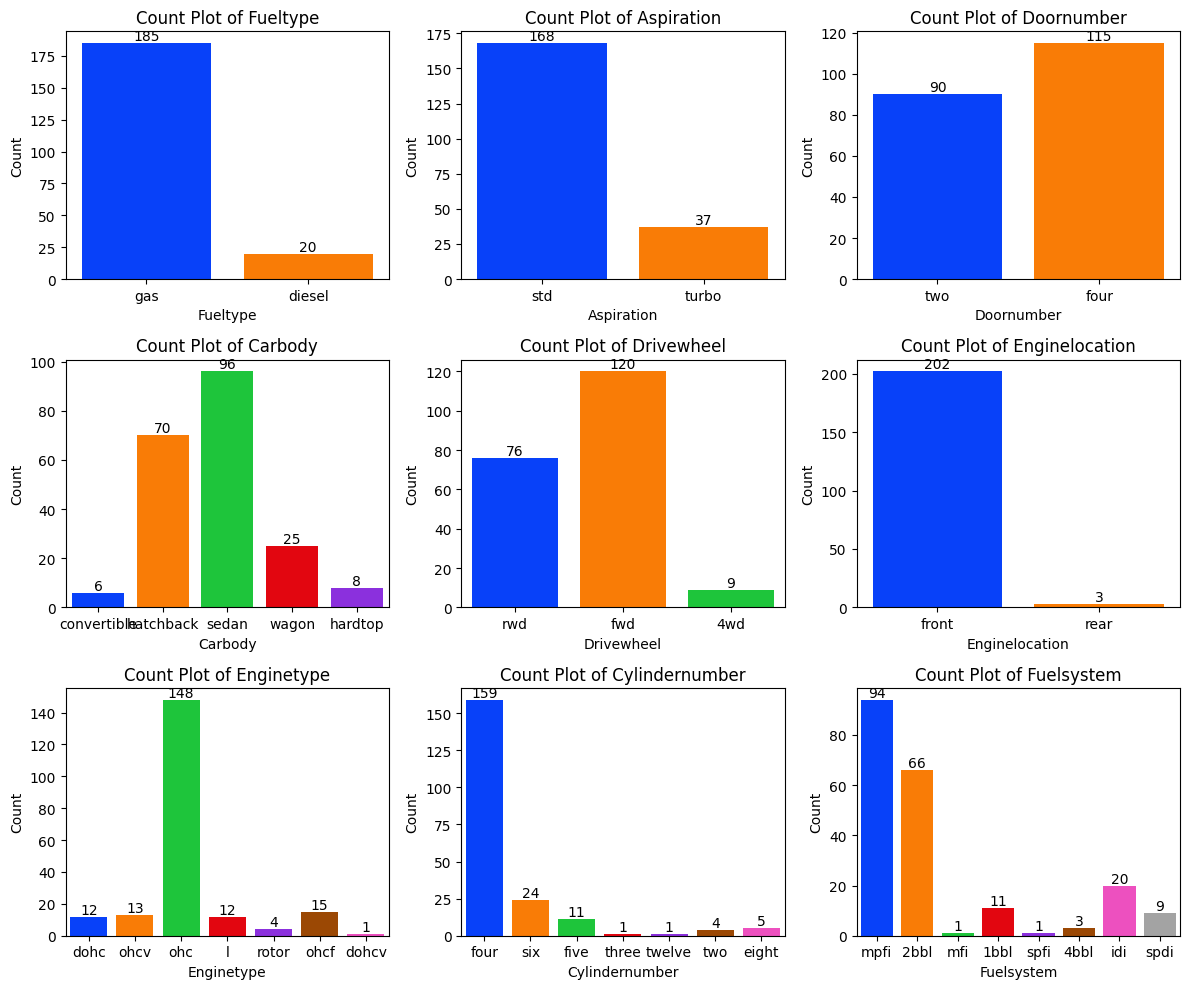

In [20]:
#count plot of each categorical features to Show the counts of observations in each categorical bin using bars.
#list of categorical column to analyze
categorical_columns=['fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem']

#create subplots
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(12,10))
axes=axes.ravel() #generates a one-dimensional array by unraveling the elements in row-major 
## Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns): #enumerate(categorical_columns): This function pairs each item in the categorical_columns list with its corresponding index. 
                                                 #It returns an iterable where each item is a tuple containing the index and the value from the list.
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95,hue=column)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')


# Adjust layout and show plots
plt.tight_layout()
plt.show()

From above count plot is clearly visualising the count of observations in each categories.
1.Car using gas as a fueltype is more than diesel
2.car with frint doors are preferred by more users
3.Most of the people uses car with fwd drivewheel
4.more used enginetype is ohc

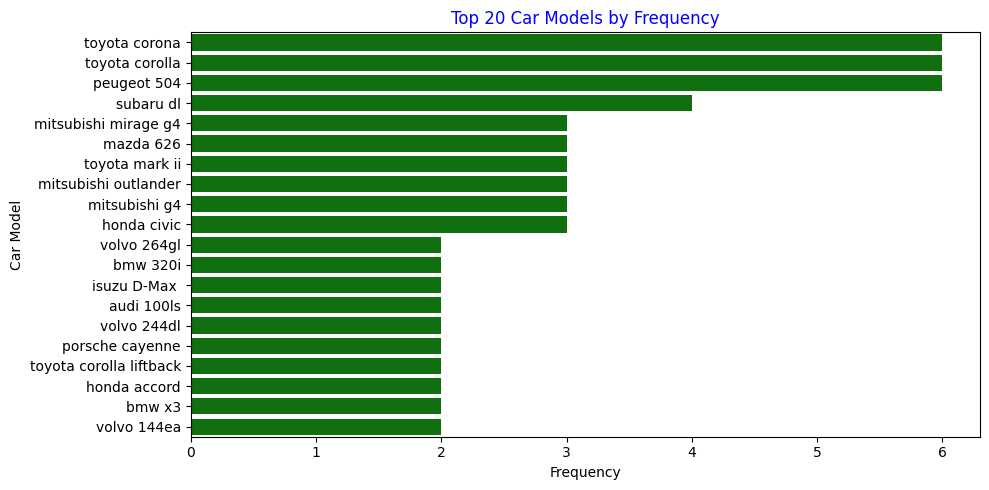

In [21]:
#Top 20 car models in frequency
n=20
top_model_cars=df['CarName'].value_counts().head(n)

#plotting top 5 cars in frequency
plt.figure(figsize=(10, 5))
sns.barplot(x=top_model_cars.values, y=top_model_cars.index,color='green')
plt.title(f'Top {n} Car Models by Frequency',color='blue')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

Toyot corona , toyota corolla , peugeot 504 is in highest position in terms of frequency.

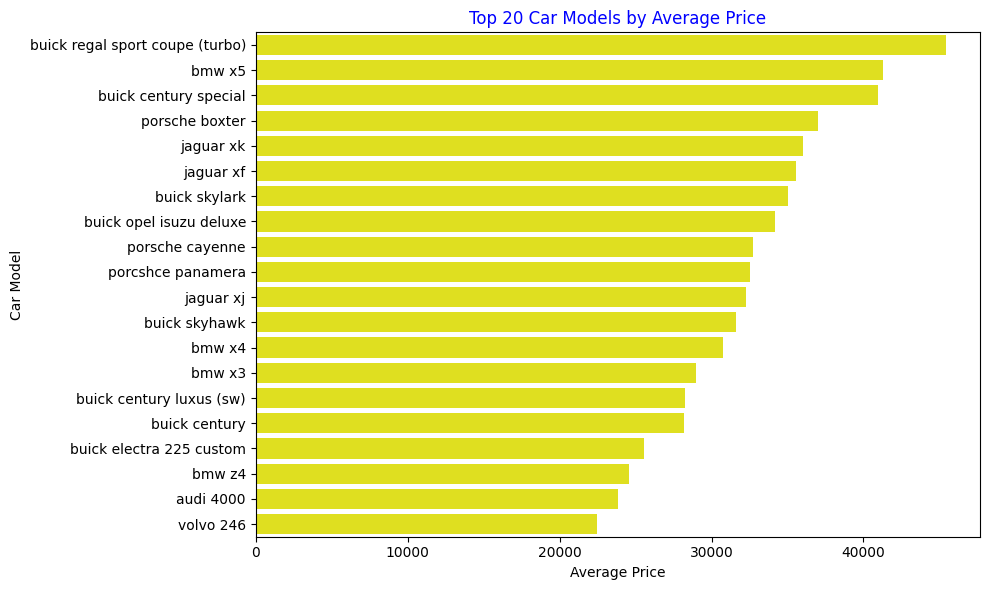

In [22]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('CarName')['price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index,color='yellow')
plt.title(f'Top {n} Car Models by Average Price',color='blue')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

In terms of average price buik regal sport coupe is in the highest poition and volvo 246 os having the lowest price.
When increasing the number of cylinders, the price tends to increase, though the majority of users stick with 4 cylinders.

As the engine size increases, so does the price
.
The wheelbase, car length, and car width have an effect on the price, but the car height doesn't seem to have any significant impact.

<h2 style='color:purple'>Label Encoding</h2>

In [23]:
#Label Encoding : converting categorical to numerical variable
categorical_column=df.select_dtypes(include=['object']).columns                     
categorical_column

label_encoder = LabelEncoder()
#This line creates an instance of the LabelEncoder class, which will be used to encode categorical variables.

for column in categorical_column:
    df[column]=label_encoder.fit_transform(df[column])
#This loop iterates over each column  in the categorical_column
#it applies the fit_transform method of the LabelEncoder object to encode the column's values with integer labels.
#The original values in the column are replaced with their encoded integer labels.

<h2 style='color:purple'>Feature Scaling</h2>

In [24]:
# Feature scaling
#Standard Scaling
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

<h2 style='color:purple'>Outlier Detection</h2>

In [25]:
price_summary=df['price'].describe()
price_summary

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

<Axes: ylabel='price'>

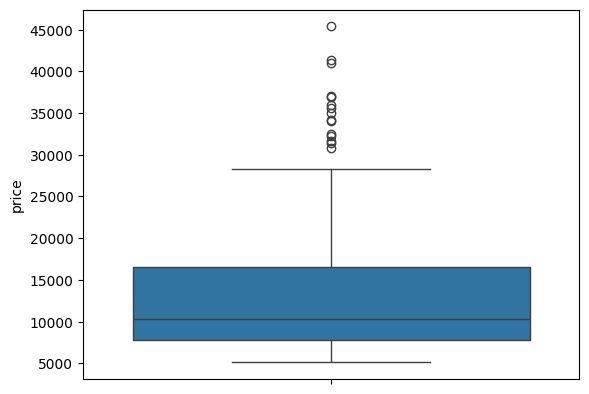

In [26]:
sns.boxplot(df['price'])

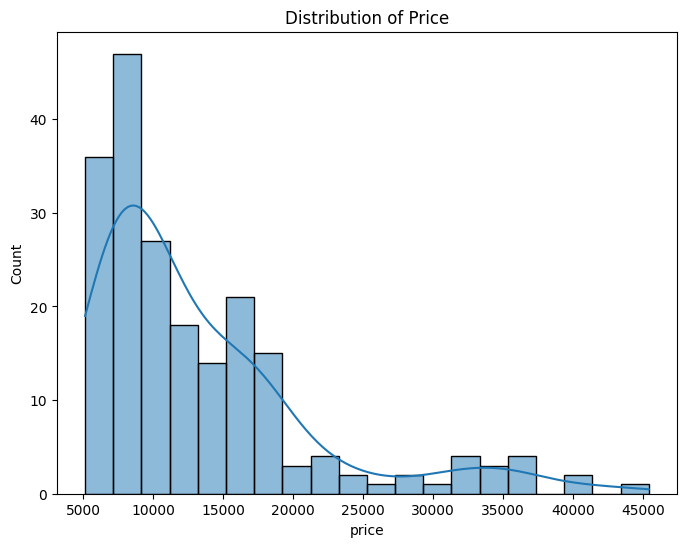

In [27]:
# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=df['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

Here the price distribution is right skewed.

In [28]:
#skewness
price_skewness=df['price'].skew()
price_skewness

1.7776781560914454

In [29]:
#removal of outliers
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)
IQR=q3-q1

upper_limit=q3+(1.5*IQR)
lower_limit=q1-(1.5*IQR)
lower_limit,upper_limit

outliers=df.loc[(df['price']>upper_limit)|(df['price']<lower_limit)]

#Trimming
df1=df.loc[(df['price']<upper_limit)&(df['price']>lower_limit)]
print('Before removing outliers:',len(df))
print('After removing outliers:',len(df1))   
print('Outliers:',len(df)-len(df1))

Before removing outliers: 205
After removing outliers: 190
Outliers: 15


<Axes: ylabel='price'>

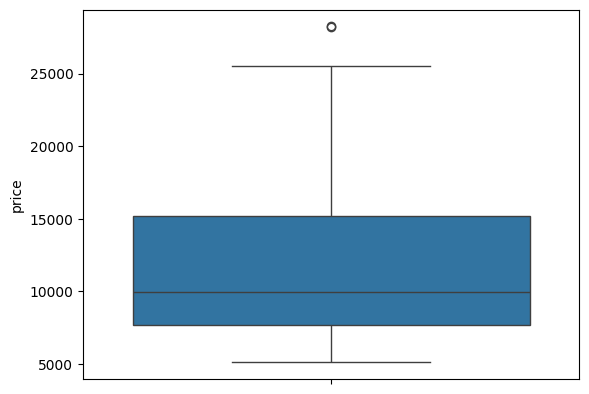

In [30]:
sns.boxplot(df1['price'])

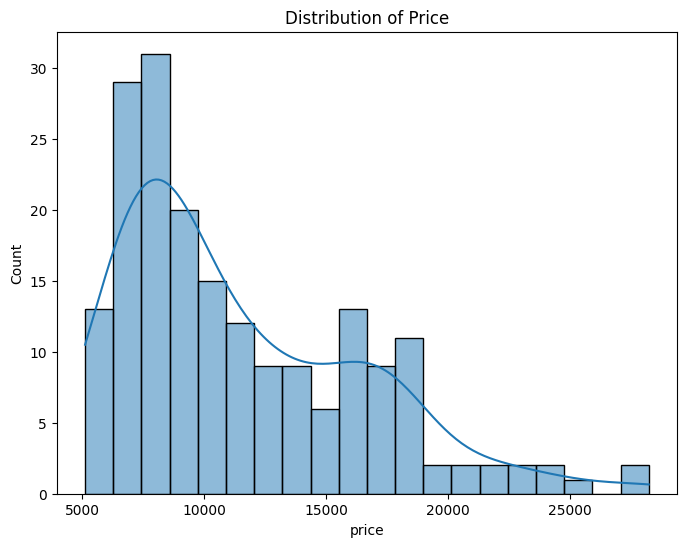

In [31]:
# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=df1['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

In [32]:
#Distribution of numerical variables
numerical_column=['symboling', 'CarName', 'fueltype', 'CompanyName', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']
numerical_column

['symboling',
 'CarName',
 'fueltype',
 'CompanyName',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

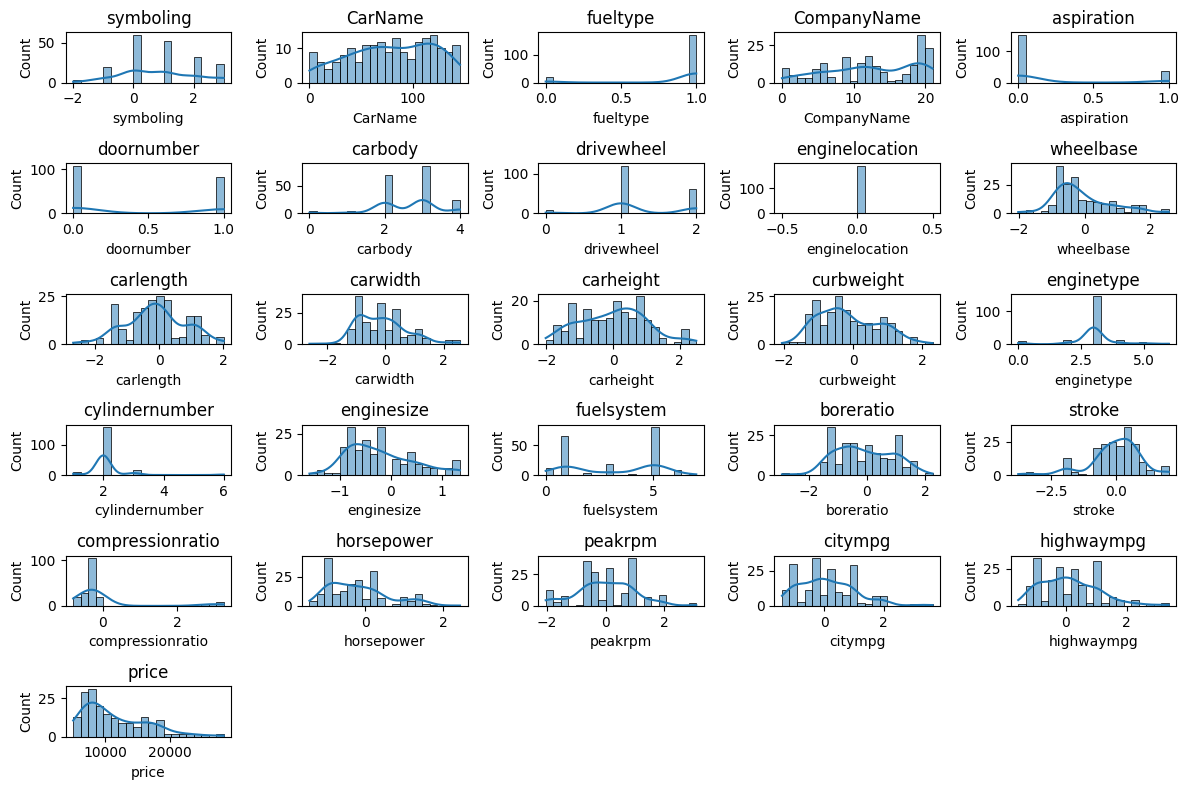

In [33]:
# Calculate the number of numerical features
num_numerical_features = len(numerical_column)

# Calculate the number of rows and columns for subplots
num_rows = (num_numerical_features - 1) // 5 + 1  # Number of rows
num_cols = min(num_numerical_features, 5)  # Number of columns (maximum 5)

plt.figure(figsize=(12, 8))

# Loop through each numerical feature
for i, feature in enumerate(numerical_column, 1):
    plt.subplot(num_rows, num_cols, i)  # Create subplot
    sns.histplot(data=df1[feature], bins=20, kde=True)
    plt.title(feature)  # Set title for each subplot

plt.tight_layout()  # Adjust layout
plt.show()

In [34]:
numerical_column
Q1 = df1[numerical_column].quantile(0.25)
Q3 = df1[numerical_column].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = (df1[numerical_column] < (Q1 - threshold * IQR)) | (df1[numerical_column] > (Q3 + threshold * IQR))
cleaned_df = df1[~outliers.any(axis=1)]


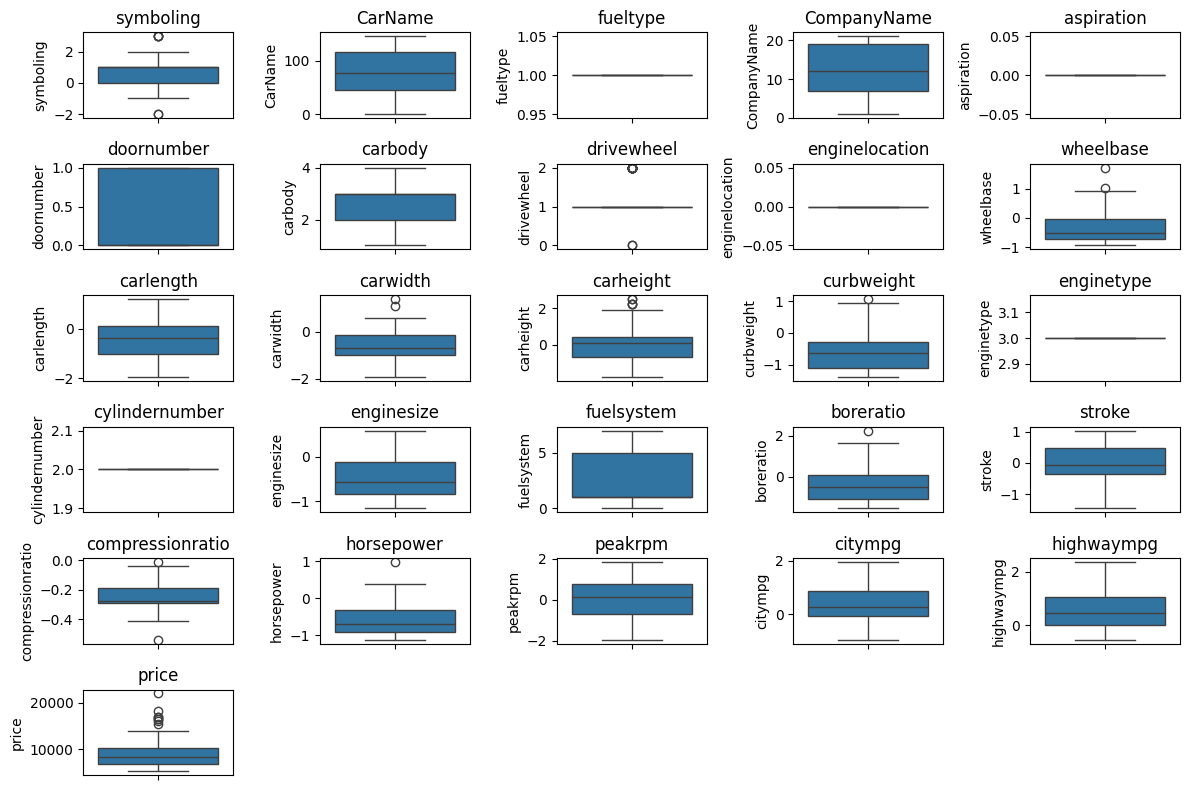

In [35]:
#Plot the boxplot for each numeric feature
# Calculate the number of numerical features
num_numerical_features = len(numerical_column)

# Calculate the number of rows and columns for subplots
num_rows = (num_numerical_features - 1) // 5 + 1  # Number of rows
num_cols = min(num_numerical_features, 5)  # Number of columns (maximum 5)

plt.figure(figsize=(12, 8))

# Loop through each numerical feature
for i, feature in enumerate(numerical_column, 1):
    plt.subplot(num_rows, num_cols, i)  # Create subplot
    sns.boxplot(data=cleaned_df[feature])
    plt.title(feature)  # Set title for each subplot

plt.tight_layout()  # Adjust layout
plt.show()

<h2 style='color:black'>Feature Selection</h2>

Constructing correlation matrix for feature selection

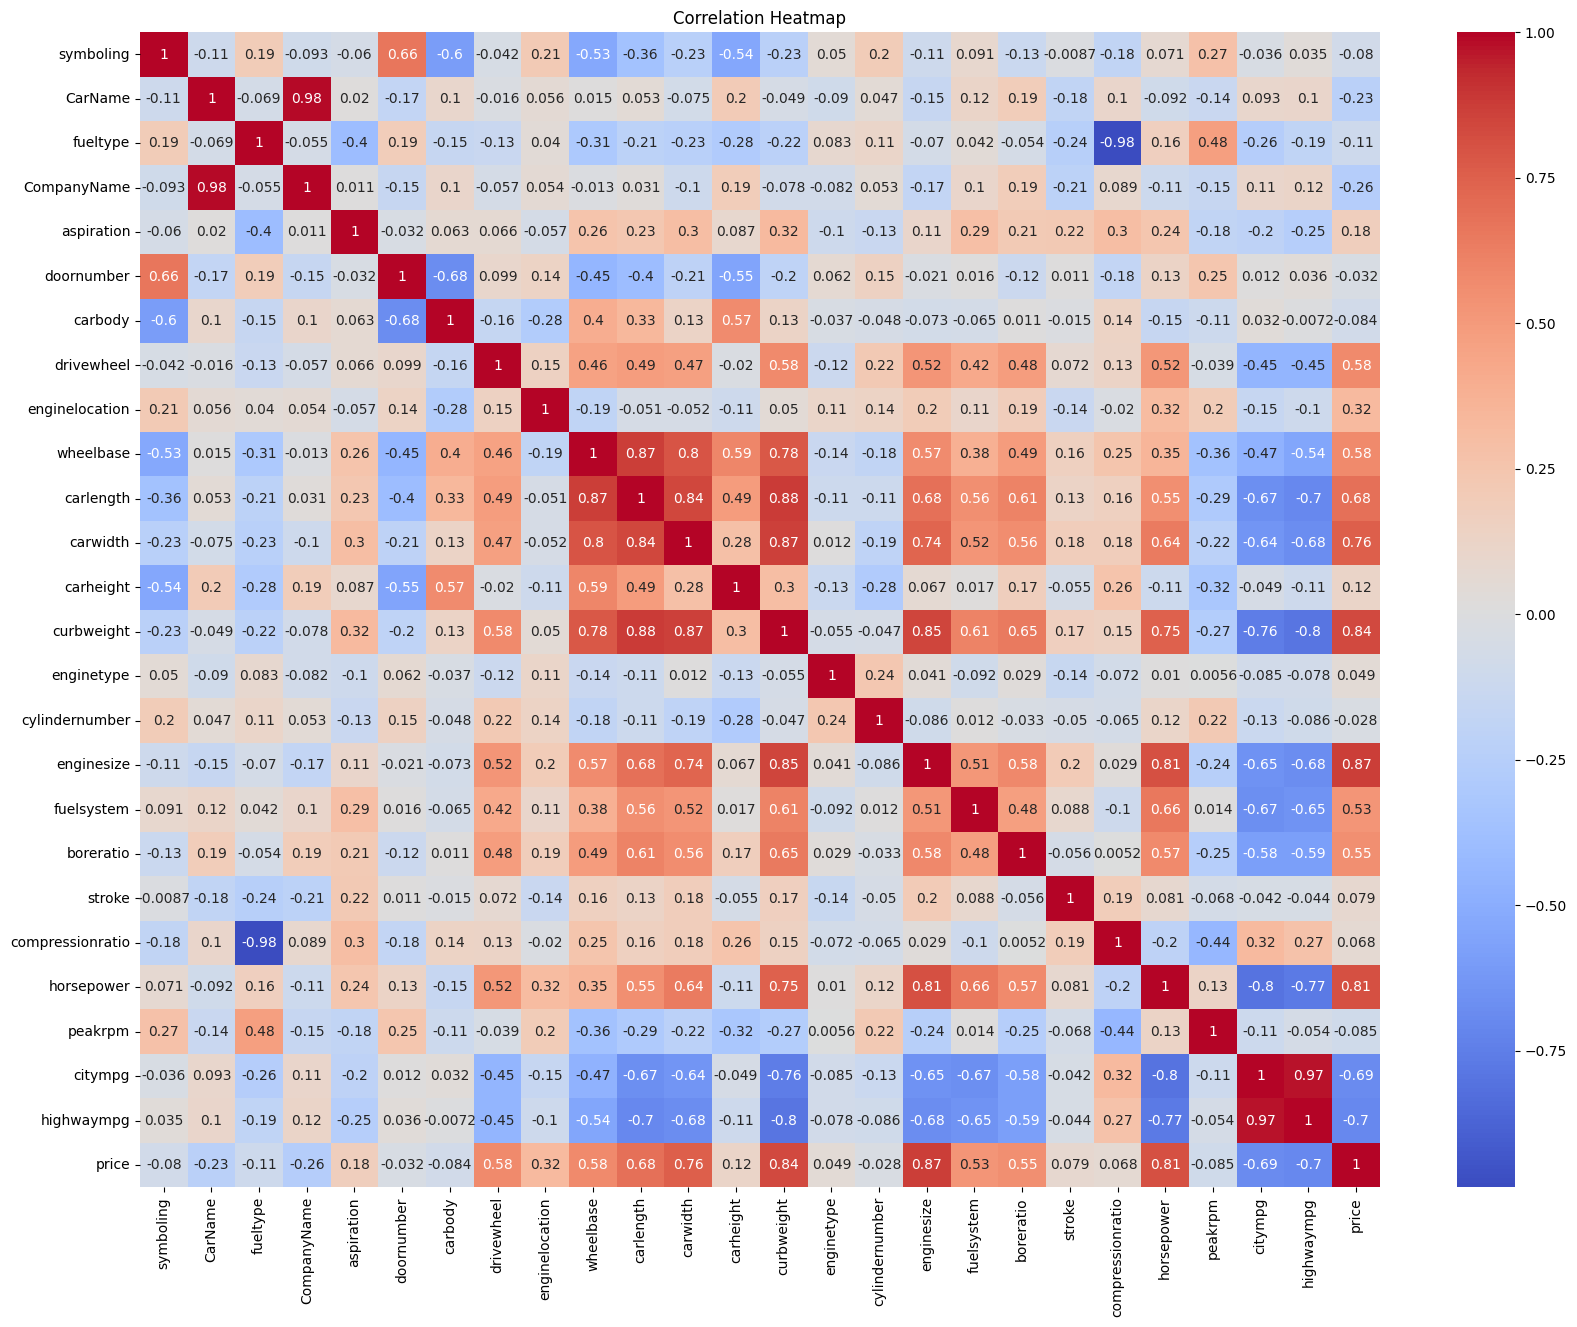

In [36]:
# Correlation Analysis
correlation_matrix = df[numerical_column].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [37]:
cleaned_df.drop(['CarName','compressionratio','carlength','citympg'],axis=1,inplace=True)

## Data Splitting

In [38]:
#splitting the data
# X should contain the features used for prediction, and y should contain the target variable
X = cleaned_df.drop('price',axis=1)  # Features
y = cleaned_df['price']  # Target variable


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (76, 21)
Shape of X_test: (20, 21)
Shape of y_train: (76,)
Shape of y_test: (20,)


## Model Fitting

## A. Regression

#### 1.Linear Regression Model

In [39]:
#model fitting
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [40]:
#intercept
intercept=model.intercept_
intercept

11389.47311359844

In [41]:
#slope
coefficients=model.coef_
coefficients

array([-3.37536743e+02, -1.81330506e-11, -6.78020273e+01,  5.00222086e-12,
       -2.80454829e+02,  3.47742384e+02, -4.03597607e+02,  7.95807864e-12,
        2.85145561e+02,  3.82913663e+02, -5.58974578e+02,  8.92791762e+02,
        7.27595761e-12,  2.72848411e-12, -7.51775045e+03,  9.51421794e+01,
        2.60329086e+03, -3.71948725e+02,  5.45660938e+03, -9.83004235e+01,
       -8.77801902e+02])

In [42]:
# Construct the equation
equation = f"price = {intercept:.2f}"
for feature, coefficient in zip(X.columns, coefficients):
    equation += f" + ({coefficient:.2f} * {feature})"

print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
price = 11389.47 + (-337.54 * symboling) + (-0.00 * fueltype) + (-67.80 * CompanyName) + (0.00 * aspiration) + (-280.45 * doornumber) + (347.74 * carbody) + (-403.60 * drivewheel) + (0.00 * enginelocation) + (285.15 * wheelbase) + (382.91 * carwidth) + (-558.97 * carheight) + (892.79 * curbweight) + (0.00 * enginetype) + (0.00 * cylindernumber) + (-7517.75 * enginesize) + (95.14 * fuelsystem) + (2603.29 * boreratio) + (-371.95 * stroke) + (5456.61 * horsepower) + (-98.30 * peakrpm) + (-877.80 * highwaympg)


##### Prediction

In [43]:
y_predicted_train=model.predict(X_train)

In [44]:
y_predicted_test=model.predict(X_test)
y_predicted_test

array([10962.99215293, 10309.29237191,  9004.51229326, 15402.4404354 ,
        8802.27317402, 10555.08960675,  8473.89544504,  9538.65503952,
       12804.09753101,  9659.66744828,  5453.06685516,  7796.245856  ,
        8879.08515651,  8144.86059094,  8802.27317402,  7477.61238486,
        6878.81947251,  9372.26053095, 10032.79524949,  7639.41358638])

In [45]:
X_test.iloc[1]

symboling          2.000000
fueltype           1.000000
CompanyName       19.000000
aspiration         0.000000
doornumber         1.000000
carbody            1.000000
drivewheel         2.000000
enginelocation     0.000000
wheelbase         -0.059361
carwidth          -0.143836
carheight         -0.707626
curbweight        -0.037669
enginetype         3.000000
cylindernumber     2.000000
enginesize         0.459611
fuelsystem         5.000000
boreratio          1.074252
stroke             0.781845
horsepower         0.301233
peakrpm           -0.683286
highwaympg        -0.109354
Name: 168, dtype: float64

In [46]:
y_test.iloc[1] #y

9639.0

In [47]:
y_predicted_test[1] #y_hat

10309.292371911579

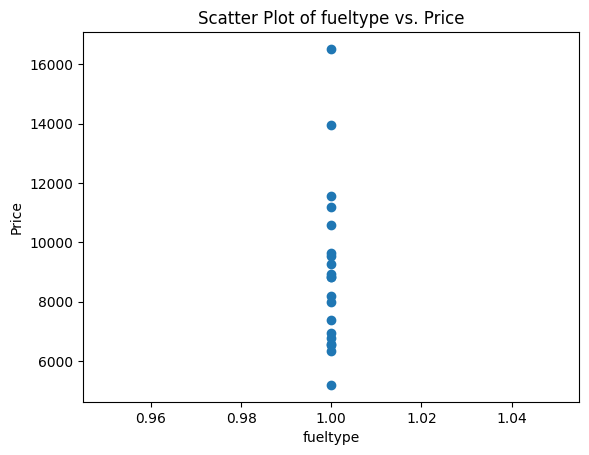

In [48]:
import matplotlib.pyplot as plt

# Choose a single feature to visualize (e.g., the first feature)
feature_to_visualize = X_test.columns[1]

# Plot the chosen feature against the target variable
plt.scatter(X_test[feature_to_visualize], y_test)
plt.xlabel(feature_to_visualize)
plt.ylabel('Price')
plt.title(f'Scatter Plot of {feature_to_visualize} vs. Price')
plt.show()

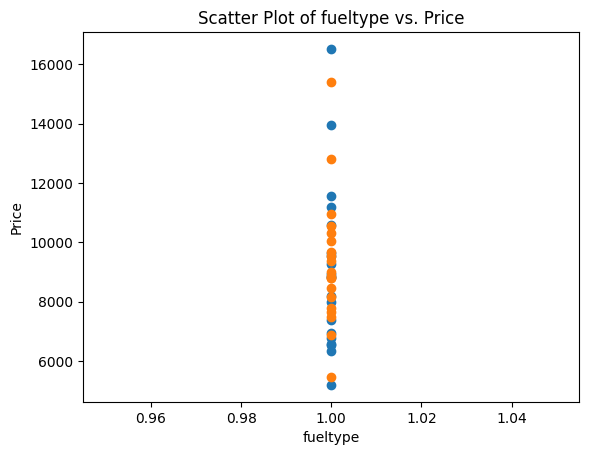

In [49]:
#scatterplot of test data
plt.scatter(X_test[feature_to_visualize], y_test)

#plot the prediction made by the model
plt.scatter(X_test[feature_to_visualize], y_predicted_test)
plt.xlabel(feature_to_visualize)
plt.ylabel('Price')
plt.title(f'Scatter Plot of {feature_to_visualize} vs. Price')
plt.show()

## Model Evaluation

In [50]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_predicted_test)
r2_square = r2_score(y_test,y_predicted_test)
mae=mean_absolute_error(y_test,y_predicted_test)
RMSE=np.sqrt(mse)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')
print(f'Mean absolute Error: {mae}')
print(f'RMSE: {RMSE}')

 R-squared: 0.8068856037893357
Mean Squared Error: 1377366.9103042497
Mean absolute Error: 940.0515368544353
RMSE: 1173.6127599443735


The R-squared value of approximately 0.73 suggests that the model provides a good fit to the data, explaining about 73% of the variability in the target variable.
The relatively low MSE further supports the model's goodness of fit, indicating that the model's predictions are accurate on average.

In [51]:
mse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train,y_predicted_train)
mae=mean_absolute_error(y_train,y_predicted_train)
rmse=np.sqrt(mse)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')
print(f'Mean absolute Error: {mae}')
print(f'RMSE: {RMSE}')

 R-squared: 0.8068856037893357
Mean Squared Error: 1244055.6304565438
Mean absolute Error: 850.3757381914332
RMSE: 1173.6127599443735


##### By comparing the R-squared scores on both training and test data, you can assess the model's performance and whether it is overfitting or underfitting. If the R-squared score is significantly higher on the training data compared to the test data, it may indicate overfitting. Conversely, if the scores are similar but low, it may indicate underfitting..

In [52]:
model.score(X_test,y_test) #same as r2_square

0.8068856037893357

In [53]:
#cross_validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X_train,y_train,cv=5) #cv=5 no of times divided 
scores

array([0.56440969, 0.41118445, 0.87253475, 0.61916312, 0.76042721])

In [54]:
scores.mean()

0.645543843763914

The performance metrics obtained from all iterations are averaged to obtain a single estimate of the model's performance.

## 2. Decision Tree regressor

Model1 : Decision Tree Regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
tree=DecisionTreeRegressor(max_depth=5)

In [57]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [58]:
predicted_y=tree.predict(X_test)

In [59]:
predicted_y

array([ 9384.71428571,  9384.71428571,  8349.33333333, 14939.        ,
       10176.5       ,  9384.71428571,  7758.9       ,  6989.        ,
       10176.5       ,  9384.71428571,  6383.875     ,  7035.83333333,
        9384.71428571,  7758.9       , 10176.5       ,  6383.875     ,
        7758.9       , 12557.5       ,  9384.71428571,  8063.66666667])

In [60]:



predicted_ytrain=tree.predict(X_train)

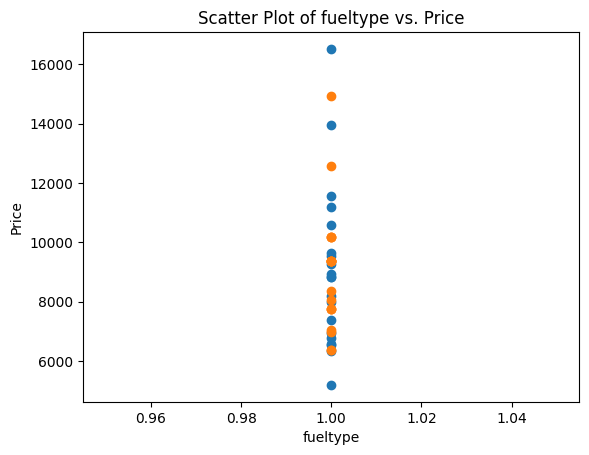

In [61]:

#scatterplot of test data
plt.scatter(X_test[feature_to_visualize], y_test)

#plot the prediction made by the model
plt.scatter(X_test[feature_to_visualize], predicted_y)
plt.xlabel(feature_to_visualize)
plt.ylabel('Price')
plt.title(f'Scatter Plot of {feature_to_visualize} vs. Price')
plt.show()






Evaluation

In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [63]:
mae=mean_absolute_error(y_test,predicted_y)
mse=mean_squared_error(y_test,predicted_y)
rmse=np.sqrt(mse)
r2=r2_score(y_test,predicted_y)

print(f"mean_absolute_error:{mae}")
print(f"mean_squared_error:{mse}")
print(f"r2_score:{r2}")
print(f"RMSE:{rmse}")


mean_absolute_error:1264.9260714285713
mean_squared_error:3398641.183504676
r2_score:0.5234918632216701
RMSE:1843.5403937816702


In [64]:
mae=mean_absolute_error(y_train,predicted_ytrain)
mse=mean_squared_error(y_train,predicted_ytrain)
rmse=np.sqrt(mse)
r2=r2_score(y_train,predicted_ytrain)

print(f"mean_absolute_error:{mae}")
print(f"mean_squared_error:{mse}")
print(f"r2_score:{r2}")
print(f"RMSE:{rmse}")

mean_absolute_error:438.69721177944865
mean_squared_error:426808.39334273187
r2_score:0.9613197366728127
RMSE:653.3057426218844


Here the mse is 0 and R-squares is 1

## 3. Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
random_forest_regressor=RandomForestRegressor(n_estimators=100)
random_forest_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [67]:
random_forest_regressor_predict=random_forest_regressor.predict(X_train)

In [68]:
mae=mean_absolute_error(y_train,random_forest_regressor_predict)
mse=mean_squared_error(y_train,random_forest_regressor_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_train,random_forest_regressor_predict)

print(f"mean_absolute_error:{mae}")
print(f"mean_squared_error:{mse}")
print(f"r2_score:{r2}")
print(f"RMSE:{rmse}")

mean_absolute_error:438.06163377192973
mean_squared_error:369427.51971120713
r2_score:0.9665199795373647
RMSE:607.805494966282


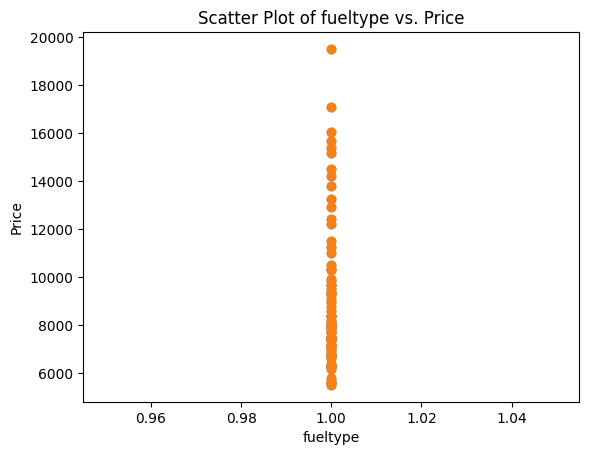

In [69]:
#scatterplot of test data
plt.scatter(X_train[feature_to_visualize], random_forest_regressor_predict)

#plot the prediction made by the model
plt.scatter(X_train[feature_to_visualize], random_forest_regressor_predict)
plt.xlabel(feature_to_visualize)
plt.ylabel('Price')
plt.title(f'Scatter Plot of {feature_to_visualize} vs. Price')
plt.show()

## 4. Gradient Boosting Regressor

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
g_regressor=GradientBoostingRegressor(n_estimators=100)
g_regressor.fit(X_train,y_train)
g_regressor_pred=g_regressor.predict(X_train)

In [72]:
mae=mean_absolute_error(y_train,g_regressor_pred)
mse=mean_squared_error(y_train,g_regressor_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_train,g_regressor_pred)

print(f"mean_absolute_error:{mae}")
print(f"mean_squared_error:{mse}")
print(f"r2_score:{r2}")
print(f"RMSE:{rmse}")

mean_absolute_error:205.0492440858049
mean_squared_error:73224.09020452434
r2_score:0.9933639376938627
RMSE:270.59950148609727


## 5. Support Vector Regressor

In [73]:
from sklearn.svm import SVR

In [74]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR()

In [75]:
y_predict=regressor.predict(X_train)

In [76]:
mae=mean_absolute_error(y_train,y_predict)
mse=mean_squared_error(y_train,y_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_predict)

print(f"mean_absolute_error:{mae}")
print(f"mean_squared_error:{mse}")
print(f"r2_score:{r2}")
print(f"RMSE:{rmse}")

mean_absolute_error:2296.2177648497614
mean_squared_error:11797837.91862934
r2_score:-0.06919986697077318
RMSE:3434.798089936196


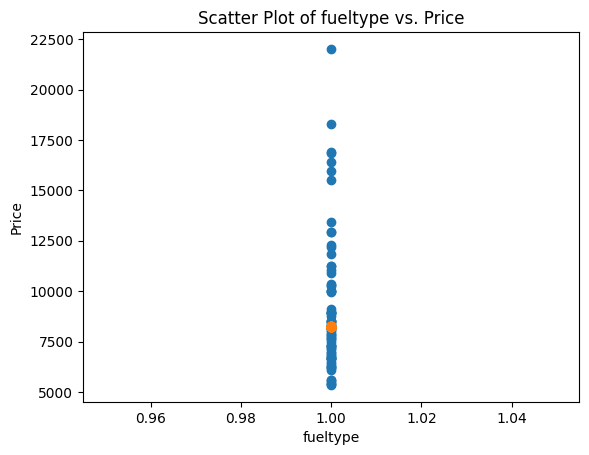

In [77]:
#scatterplot of test data
plt.scatter(X_train[feature_to_visualize], y_train)

#plot the prediction made by the model
plt.scatter(X_train[feature_to_visualize],y_predict)
plt.xlabel(feature_to_visualize)
plt.ylabel('Price')
plt.title(f'Scatter Plot of {feature_to_visualize} vs. Price')
plt.show()

DataFrame with MAE (Mean Absolute Error), MSE (Mean Squared Error), R-squared, and RMSE (Root Mean Squared Error) values of each regressor

In [78]:

models={"Linear Regression":LinearRegression(),"Decision Tree":DecisionTreeRegressor(max_depth=5),
       "Random Forest":RandomForestRegressor(n_estimators=100),
       "Gradient Boosting":GradientBoostingRegressor(n_estimators=100),"SVR":SVR(kernel = 'rbf')}

# List to store results
results = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results.append({'Regressor': name, 'MAE': mae, 'MSE': mse, 'R-squared': r2, 'RMSE': rmse})

# Convert results list to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)

           Regressor          MAE           MSE  R-squared         RMSE
0  Linear Regression   940.051537  1.377367e+06   0.806886  1173.612760
1      Decision Tree  1264.926071  3.398641e+06   0.523492  1843.540394
2      Random Forest  1174.777250  2.994236e+06   0.580192  1730.386029
3  Gradient Boosting  1277.010093  3.375079e+06   0.526795  1837.138726
4                SVR  2024.694493  7.803964e+06  -0.094159  2793.557662


##### Lower values of MSE indicate better model performance, as they imply that the model's predictions are closer to the actual values on average.
##### MSE value of 3.267363e-24 suggests relatively low error
##### A Root Mean Squared Error (RMSE) value of 1.807585e-12 means that, on average, the difference between the actual price and the predicted price is approximately 1.807585e-12 units.



##### R-squared (R2):

##### Measures the proportion of the variance in the dependent variable (y) that is predictable from the independent variables (X).
##### Higher values (closer to 1) indicate better performance.
##### R2 can range from 0 to 1. A negative R2 indicates that the model is worse than a horizontal line.
##### Here 1.000000 is the best value.

From the above dataframe it is clear that linear regression model is the best fitting model for predicting the car price.

## B. Classification

In [79]:
#loading dataset

In [80]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd


#loading the dataset
iris= load_iris()

# PLACE THE IRIS DATA IN A PANDAS 
# DATAFRAME 
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Add the target variable to the dataframe
df['target'] = iris.target

# Print the first 5 rows of the dataframe
print("Original DataFrame:")
print(df.head())




Original DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [82]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [83]:
numerical_columns = df.select_dtypes(include='number').columns
print(numerical_columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


In [84]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [85]:
# Identify duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 1


In [86]:
# Check for duplicated rows based on all columns
duplicated_rows = df.duplicated(subset=df.columns)

# Filter the DataFrame to show duplicated rows
duplicate_df = df[duplicated_rows]

# Print the duplicated rows
print("Duplicated Rows:")
print(duplicate_df)

#checking for duplicates
df.duplicated().sum()

df.drop_duplicates()

Duplicated Rows:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
142                5.8               2.7                5.1               1.9   

     target  
142       2  


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [87]:
#checking for data imbalance
df.groupby('target').size()

target
0    50
1    50
2    50
dtype: int64

In [88]:
df.tail(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [89]:
# to display no. of samples on each class
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

#### Exploratory Data Analysis

In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


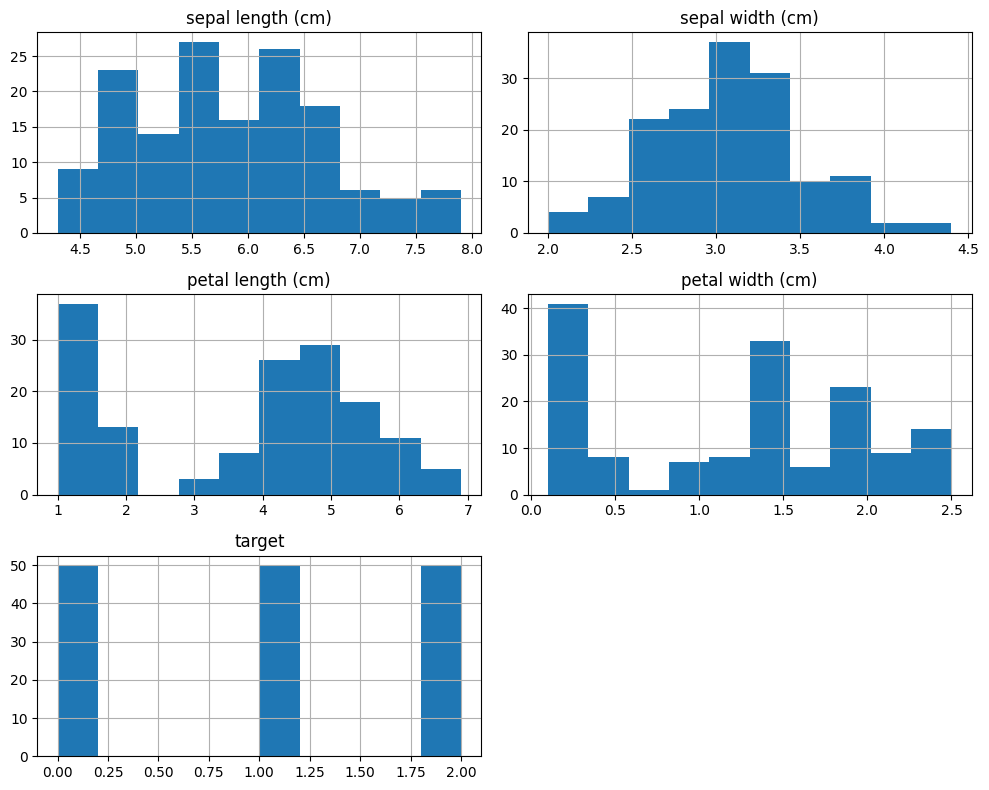

In [91]:
# Plot histograms for each feature
df.hist(figsize=(10, 8))
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

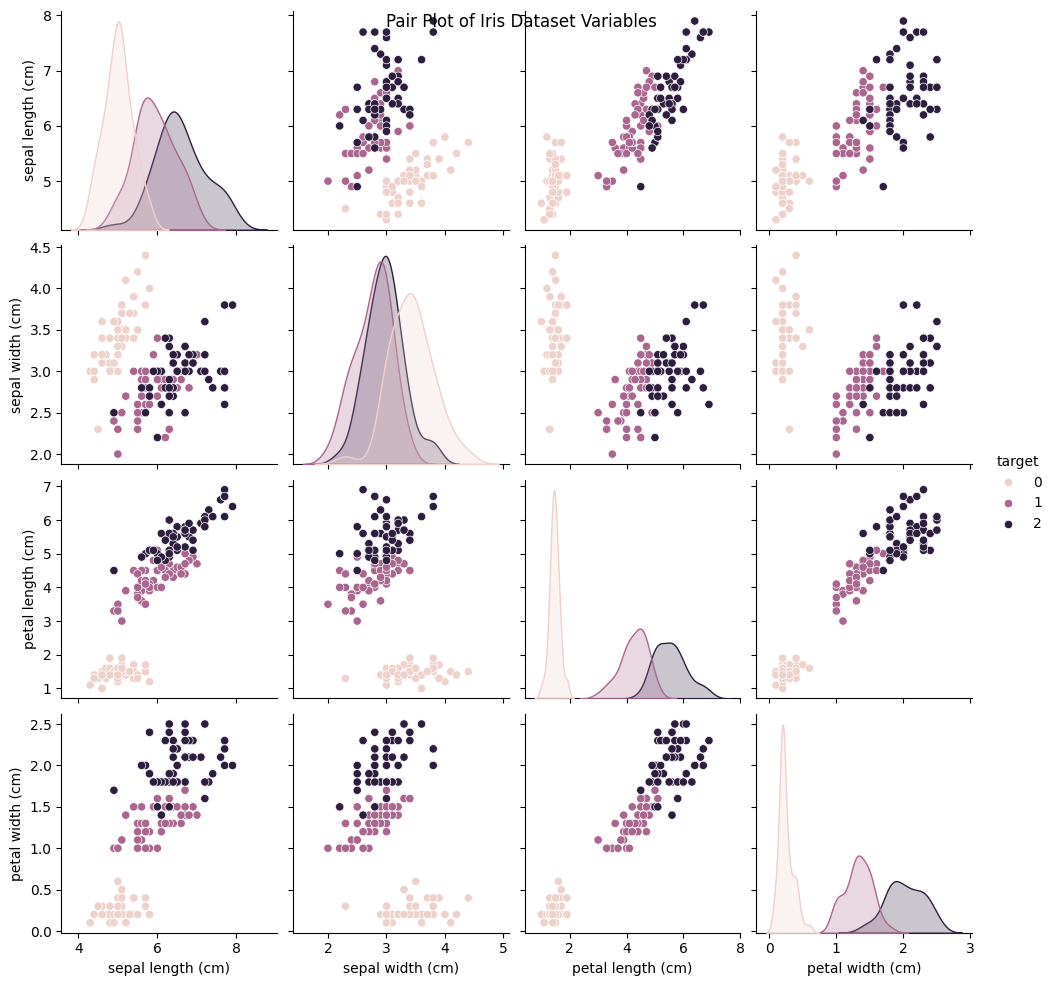

In [92]:
# Create a pair plot
sns.pairplot(df, hue='target')
plt.suptitle('Pair Plot of Iris Dataset Variables')
plt.show()

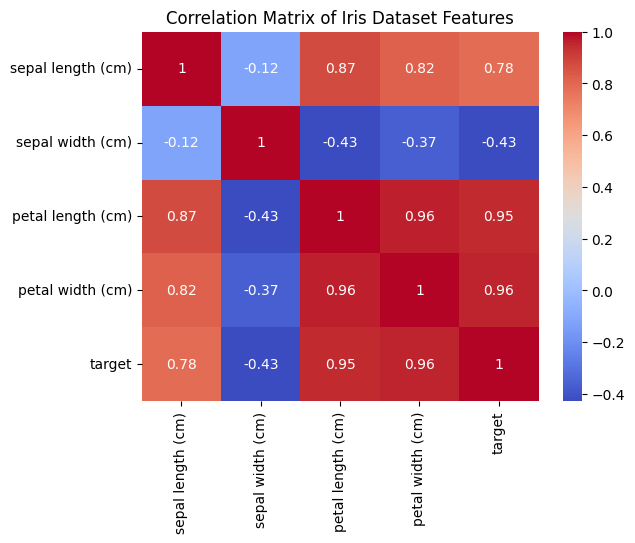

In [93]:
# Calculate correlations
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()


In [94]:
#replacing the missing values with the median of the feature
df = df.fillna(df.median())

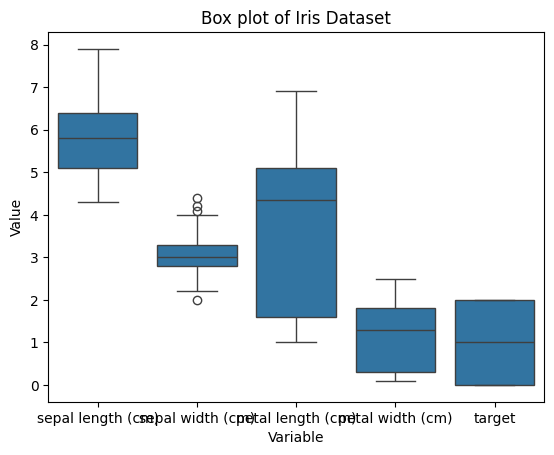

In [95]:
# Create box plots for each variable
sns.boxplot(x="variable", y="value", data=pd.melt(df))

# Set plot title and labels
plt.title("Box plot of Iris Dataset")
plt.xlabel("Variable")
plt.ylabel("Value")

# Display the plot
plt.show()


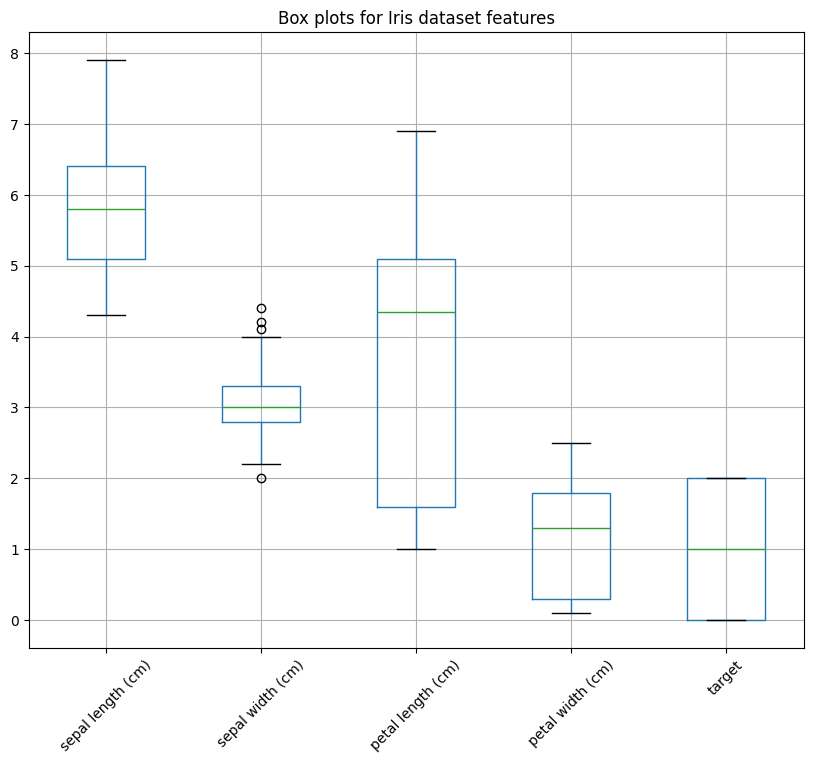

In [96]:
# Plot box plots for each feature
plt.figure(figsize=(10, 8))
df.boxplot()
plt.title('Box plots for Iris dataset features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [97]:
# Calculate quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper caps
lower_cap = Q1 - 1.5 * IQR
upper_cap = Q3 + 1.5 * IQR

# Apply capping to remove outliers
df_capped = df[(df >= lower_cap) & (df <= upper_cap)]

# Display the DataFrame after capping
print(df_capped)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

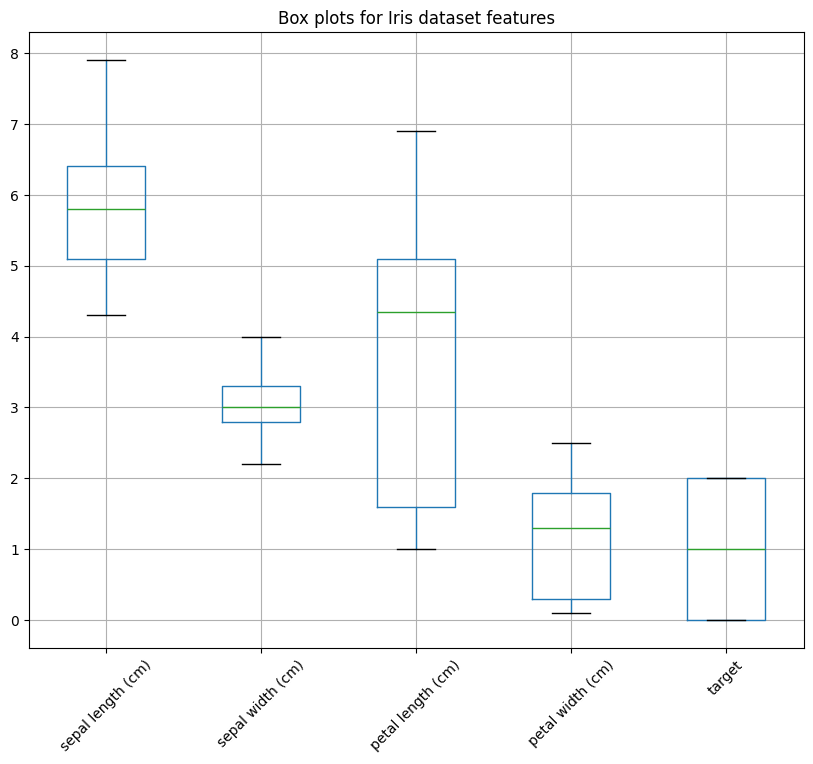

In [98]:
# Plot box plots for each feature
plt.figure(figsize=(10, 8))
df_capped.boxplot()
plt.title('Box plots for Iris dataset features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [99]:
#checking the statistical summary
df_capped.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,146.000000,150.000000,150.000000,150.000000
mean,5.843333,3.040411,3.758000,1.199333,1.000000
std,0.828066,0.397853,1.765298,0.762238,0.819232
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.000000,6.900000,2.500000,2.000000


In [100]:
X=df_capped.iloc[:,[0,1,2,3]]
y=df_capped.iloc[:,4]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [101]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [102]:
#feature scaling
# Scaling using StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Convert the result back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [103]:
X_scaled.isnull().sum()
# Impute missing values with the mean of the column
X_scaled['sepal width (cm)'].fillna(X_scaled['sepal width (cm)'].mean(), inplace=True)

In [104]:
X_scaled.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [105]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

#### Splitting Dataset

In [106]:
#splitting the dataset into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.4,random_state=42)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
123,0.553333,-0.858566,0.649083,0.790671
24,-1.264185,0.906936,-1.056039,-1.315444
25,-1.021849,-0.101922,-1.226552,-1.315444
23,-0.900681,0.654721,-1.169714,-0.920548
94,-0.294842,-0.858566,0.251221,0.132510
...,...,...,...,...
71,0.310998,-0.606351,0.137547,0.132510
106,-1.143017,-1.362995,0.421734,0.659038
14,-0.052506,2.420223,-1.453901,-1.315444
92,-0.052506,-1.110781,0.137547,0.000878


In [107]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (90, 4)
Shape of X_test: (60, 4)
Shape of y_train: (90,)
Shape of y_test: (60,)


Fitting the Model

#### 1.Logistic Regression

In [108]:
#creating a model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [109]:
#fitting the model
model.fit(X_train,y_train)


LogisticRegression()

In [110]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1])

Find the accuracy of the model and view the confusion matrix. The accuracy score tells us how accurately the model we build will predict and the confusion matrix has a matrix with Actual values and predicted values. For that, import accuracy_score and confusion_matrix from the sci-kit learn metric library.

In [111]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [112]:
#accuracy score
Accuracy_score=accuracy_score(y_test,y_pred)
Accuracy_score

0.9833333333333333

In [113]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 17]], dtype=int64)

##### Each row of the matrix represents the actual class
##### Each column of the matrix represents the predicted class.
##### The element in the ith row and jth column of the matrix represents the number of instances of the actual class i that were predicted as class j.

Text(95.72222222222221, 0.5, 'Truth')

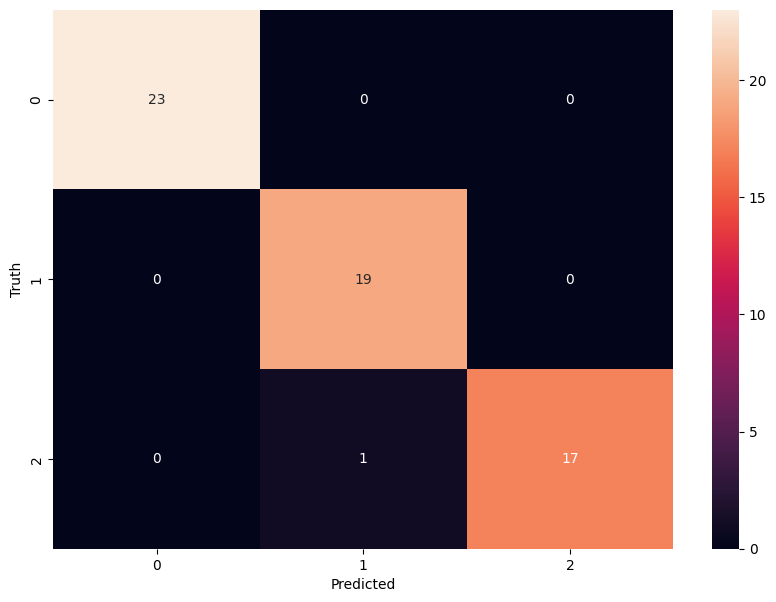

In [114]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [115]:
result = classification_report(y_test,y_pred)

In [116]:
result

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        23\n           1       0.95      1.00      0.97        19\n           2       1.00      0.94      0.97        18\n\n    accuracy                           0.98        60\n   macro avg       0.98      0.98      0.98        60\nweighted avg       0.98      0.98      0.98        60\n'

In [117]:
classification_report_str='''
'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        11\n  versicolor       0.96      1.00      0.98        24\n   virginica       1.00      0.96      0.98        25\n\n    accuracy                           0.98        60\n   macro avg       0.99      0.99      0.99        60\nweighted avg       0.98      0.98      0.98        60\n'
'''
print("classification_report:")
print(classification_report_str)

classification_report:

'              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.96      1.00      0.98        24
   virginica       1.00      0.96      0.98        25

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60
'



In [118]:
TP=np.diag(cm)

# True Negatives (TN) TN=TOTAL-(FP+FN+TP)
TN = np.sum(cm) - (np.sum(cm, axis=0) + np.sum(cm, axis=1) - TP)
TN

# False Positives (FP)
FP = np.sum(cm, axis=0) - TP

# False Negatives (FN)
FN = np.sum(cm, axis=1) - TP

# Accuracy
accuracy = (TP + TN) / np.sum(cm)

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# False Positive Rate
false_positive_rate = FP / (FP + TN)

# False Negative Rate
false_negative_rate = FN / (FN + TP)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

Accuracy: [1.         0.98333333 0.98333333]
Precision: [1.   0.95 1.  ]
Recall: [1.         1.         0.94444444]
Specificity: [1.         0.97560976 1.        ]
F1 Score: [1.         0.97435897 0.97142857]
False Positive Rate: [0.         0.02439024 0.        ]
False Negative Rate: [0.         0.         0.05555556]


#### GridSearchCV
Grid search is a technique that exhaustively searches through a specified subset of hyperparameter combinations. It creates a grid of all possible hyperparameter values and evaluates the model performance using cross-validation for each combination. This is beneficial for pre-pruning because you can specify a grid of hyperparameters related to pre-pruning constraints . By evaluating the model's performance across various combinations of these parameters, you can determine the optimal settings that prevent overfitting and maximize predictive accuracy.

In [119]:
parameter={
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
model1=LogisticRegression(max_iter=1000,solver='saga')

In [120]:
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(model1,param_grid=parameter,cv=5,scoring='accuracy')
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, solver='saga'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [121]:
cv.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [122]:
model1.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [123]:
y_predict=model1.predict(X_test)

In [124]:
print(accuracy_score(y_predict,y_test))

0.9833333333333333


98% accuracy

#### 2.Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
# model is created with default parameters. 
treemodel=DecisionTreeClassifier()

In [127]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9285714285714286, 'x[3] <= -0.526\ngini = 0.665\nsamples = 90\nvalue = [27, 31, 32]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 27\nvalue = [27, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 0.725\ngini = 0.5\nsamples = 63\nvalue = [0, 31, 32]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 0.905\ngini = 0.208\nsamples = 34\nvalue = [0, 30, 4]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= -1.082\ngini = 0.117\nsamples = 32\nvalue = [0, 30, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 0.081\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.35714285714285715, 'x[1] <= -1.994\ngini = 0.064\nsamples = 30\nvalue = [0, 29, 1]'),
 Text(0.4166666666666667, 0.21428571428571427, 'x[2] <= 0.422\ngini = 0.5\nsamples = 2\nvalue = [0

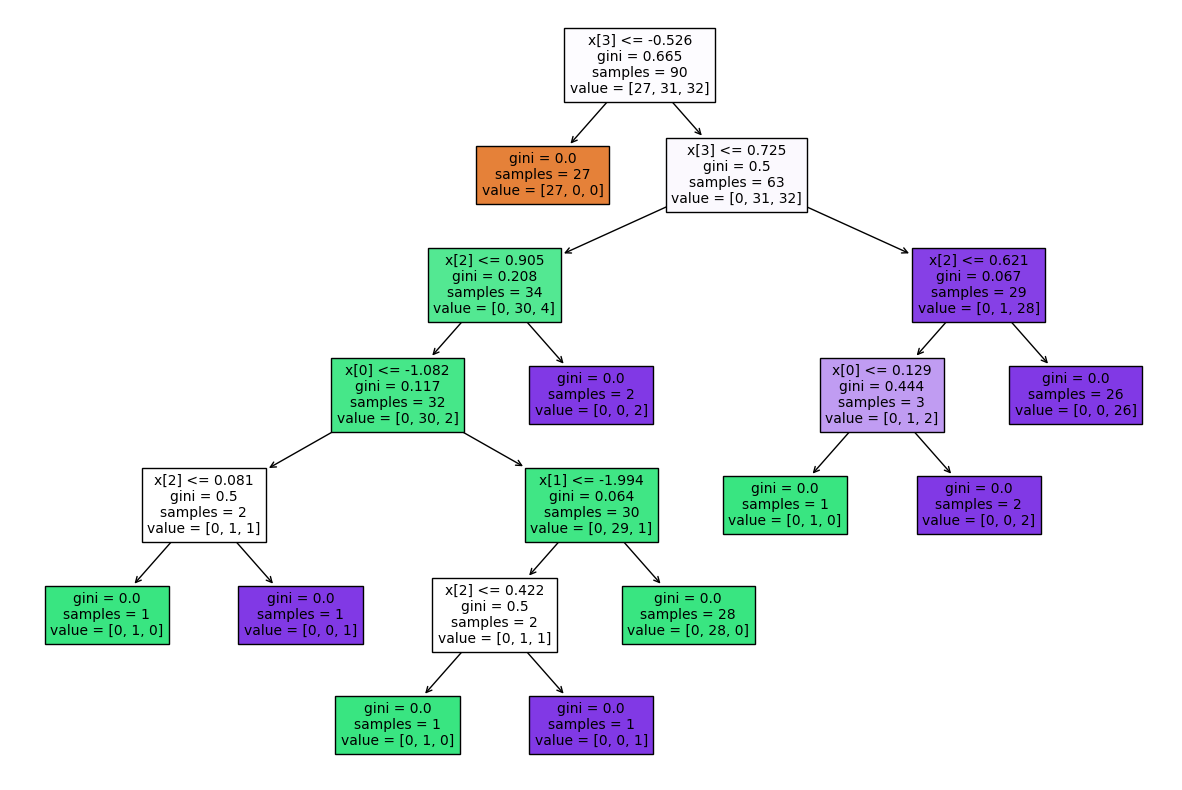

In [128]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True,fontsize=10)

Here the decision starts based on the feature x[2] <= 2.5
Here x[2] is petal length
here 29 samples belongs to  'setosa', 29 samples belongs to 'versicolor', 32 samples belongs to 'virginica'.

If [x2] <=2.5, the tree goes to the left child node, where the Gini impurity is 0.0, indicating a pure node with all samples belonging to class 0

That is if petal length is less than 2.5, the category is setosa.
.
If x[3] <= 1.75, the tree goes to the right child node, where the decision is based on x[3].

If x[2] > 2.5 , the tree goes to the left child node. Here, the decision is based on x[2].

Every leaf nod has a gini zero . By default gini is the criterion.

In [129]:
#prediction
y_predict=treemodel.predict(X_test)

In [130]:
from sklearn.metrics import accuracy_score,classification_report

In [131]:
print(accuracy_score(y_predict,y_test))

0.9666666666666667


In [132]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      0.95      0.95        19
           2       0.94      0.94      0.94        18

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



#### post pruning
In the tree, consider the third layer x12]2.255. Here out of 01 samples,290 belongs to virginica and 1 belongs to versicolor. In this case, further splitting is not necessary. We can prune the tree .

Pruning a decision tree involves removing parts of the tree that do not provide significant predictive power. It's typically done to prevent overfitting and simplify the mo.del

In decision tree algorithms, post-pruning, also known as cost-complexity pruning or just pruning, is typically done using parameters like the maximum depth of the tree, minimum samples per leaf, or minimum samples per split. These parameters control the growth of the tree during training and can help prevent overfitting..



In [133]:
# post pruning /cost complexity pruining
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

#This part computes the complexity pruning path for the decision tree model based on the training data (X_train and y_train).
#ccp_alphas contains the effective alphas for pruning the decision tree.
path = model.cost_complexity_pruning_path(X_train, y_train)
print(path)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

clfs = []
accuracy = []

#In this loop, a decision tree model is trained for each value of ccp_alpha (effective alpha for pruning).
#The DecisionTreeClassifier is instantiated with random_state=0 to ensure reproducibility, and ccp_alpha is set accordingly.
#The model is then fitted to the training data (X_train, y_train), and the trained model is stored in the clfs list.
#Additionally, the accuracy of each model on the test data (X_test, y_test) is calculated using the accuracy_score and stored in the accuracy list.
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, pred))

print(clfs)
print(accuracy)

{'ccp_alphas': array([0.        , 0.01041667, 0.01072797, 0.03676471, 0.25002451,
       0.31502646]), 'impurities': array([0.        , 0.04166667, 0.06312261, 0.09988731, 0.34991182,
       0.66493827])}
[0.         0.01041667 0.01072797 0.03676471 0.25002451 0.31502646]
[DecisionTreeClassifier(random_state=0), DecisionTreeClassifier(ccp_alpha=0.010416666666666666, random_state=0), DecisionTreeClassifier(ccp_alpha=0.010727969348658996, random_state=0), DecisionTreeClassifier(ccp_alpha=0.03676470588235293, random_state=0), DecisionTreeClassifier(ccp_alpha=0.25002450533214565, random_state=0), DecisionTreeClassifier(ccp_alpha=0.3150264550264551, random_state=0)]
[0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.6833333333333333, 0.3]


In [134]:
best_alpha_index = accuracy.index(max(accuracy))
best_alpha = ccp_alphas[best_alpha_index]
best_model = clfs[best_alpha_index]

print("Best Alpha:", best_alpha)
print("Best Model:", best_model)
print("Accuracy with Best Model:", accuracy[best_alpha_index])

Best Alpha: 0.010416666666666666
Best Model: DecisionTreeClassifier(ccp_alpha=0.010416666666666666, random_state=0)
Accuracy with Best Model: 0.9833333333333333


[Text(0.375, 0.9, 'x[3] <= -0.526\ngini = 0.665\nsamples = 90\nvalue = [27, 31, 32]'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 27\nvalue = [27, 0, 0]'),
 Text(0.5, 0.7, 'x[3] <= 0.725\ngini = 0.5\nsamples = 63\nvalue = [0, 31, 32]'),
 Text(0.25, 0.5, 'x[2] <= 0.905\ngini = 0.208\nsamples = 34\nvalue = [0, 30, 4]'),
 Text(0.125, 0.3, 'gini = 0.117\nsamples = 32\nvalue = [0, 30, 2]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.5, 'x[2] <= 0.621\ngini = 0.067\nsamples = 29\nvalue = [0, 1, 28]'),
 Text(0.625, 0.3, 'x[0] <= 0.129\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26]')]

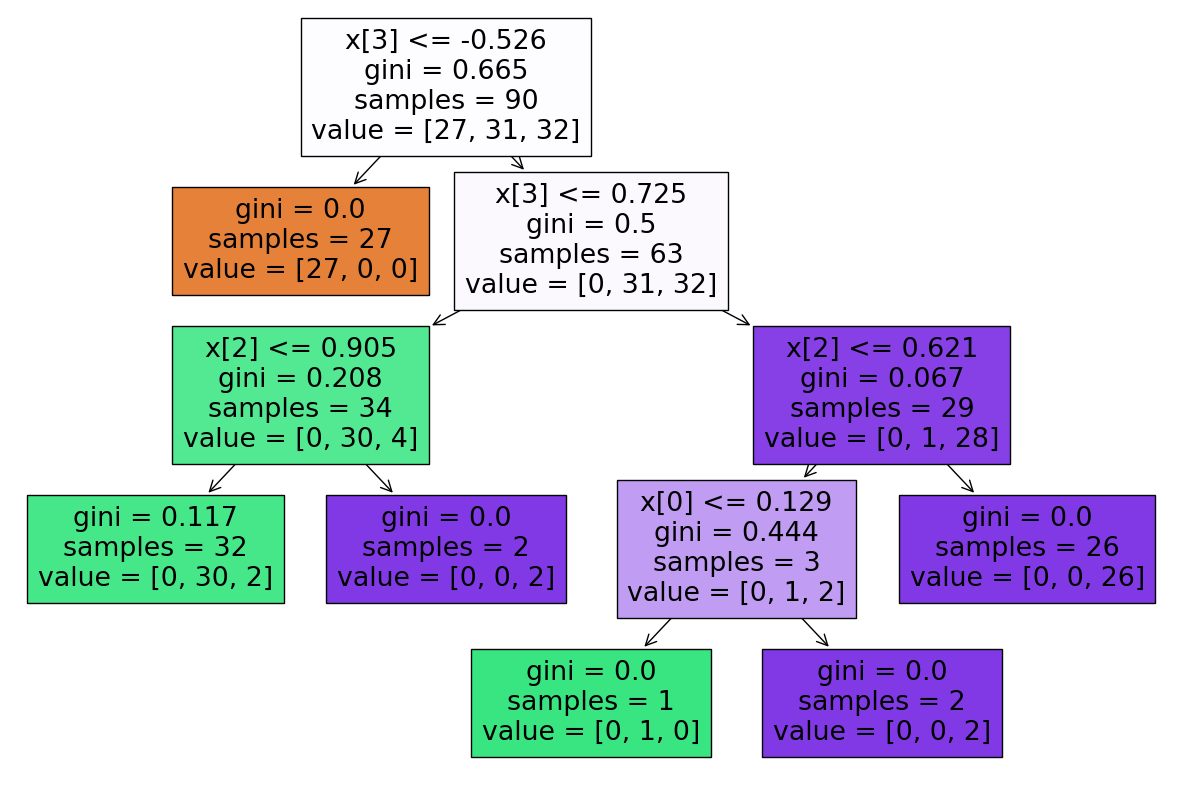

In [135]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(best_model,filled=True)

#### 3. Random Forest Classifier

In [136]:
# fit a random forest model
# By default, n_estimators = 100 . ie, 100 number of trees in the forest.
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier()
rf_classifier.fit(X_train,y_train)
# Define hyperparameters grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest Classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Test Set Accuracy: 0.9833333333333333


#### 4. Support Vector Machine

In [137]:
from sklearn.svm import SVC

svc_model=SVC(kernel='rbf',C=3) #by default
svc_model.fit(X_train, y_train)

SVC(C=3)

In [138]:
from sklearn.model_selection import GridSearchCV


# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 3, 10],          # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf'
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, scoring='f1_macro', cv=5)

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best F1 score achieved during cross-validation
best_f1_score = grid_search.best_score_
print("Best F1 Score:", best_f1_score)

# Get the best trained model
best_model = grid_search.best_estimator_
print(best_model)

Best Hyperparameters: {'C': 10, 'gamma': 'scale'}
Best F1 Score: 0.926029526029526
SVC(C=10)


#### 5.  K-Nearest Neighberhood

In [139]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [140]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Test different values of n_neighbors
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Number of Neighbors:", best_params['n_neighbors'])

# Get the best trained model
best_model = grid_search.best_estimator_
print(best_model)

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Model: {accuracy:.2f}')

Best Number of Neighbors: 9
KNeighborsClassifier(n_neighbors=9)
Accuracy with Best Model: 0.98


## C. clustering

## 1. K-Means Clustering

In [141]:
from sklearn.cluster import KMeans

In [142]:
km=KMeans(n_clusters=3)
km.fit(X_train,y_train)

KMeans(n_clusters=3)

In [143]:
y_pred=km.predict(X_train,y_train)
y_pred

array([2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1,
       1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 2, 0, 2, 1, 1, 2, 0, 1, 1, 1, 2,
       0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2,
       0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 0])

In [144]:
X_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.159151,-1.340227,-1.315444
1,-1.143017,-0.101922,-1.340227,-1.315444
2,-1.385353,0.402507,-1.397064,-1.315444
3,-1.506521,0.150292,-1.283389,-1.315444
4,-1.021849,1.411365,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.101922,0.819596,1.448832
146,0.553333,-1.362995,0.705921,0.922303
147,0.795669,-0.101922,0.819596,1.053935
148,0.432165,0.906936,0.933271,1.448832


In [145]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [146]:
#find out the centroids in each cluster
km.cluster_centers_

array([[ 1.16422129,  0.25538165,  1.04931363,  1.09232774],
       [-1.08916452,  0.67717886, -1.30654509, -1.2569411 ],
       [-0.030758  , -0.90383533,  0.37218313,  0.3316456 ]])

<h4 style='color:purple'>Elbow Plot</h4>

If there are many clusters, then it is difficult to find out the optimal value of K using the scatter plot.
In this case we can use elbow plot to find K.

In [147]:
wcss= []
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(X_train,y_train)
    wcss.append(km.inertia_)

wcss

[344.6664384311234,
 139.25441120854225,
 82.66500198288472,
 76.48471041877832,
 52.936571254072604,
 45.63559158045119,
 42.35958332734279,
 38.44719766548462,
 34.77674361274623]

WCSS represents the sum of squared distances between each point and the centroid of its assigned cluster. 'wcss' will contain the WCSS values for each k from 1 to 9. 

Text(0.5, 1.0, 'Elbow Plot')

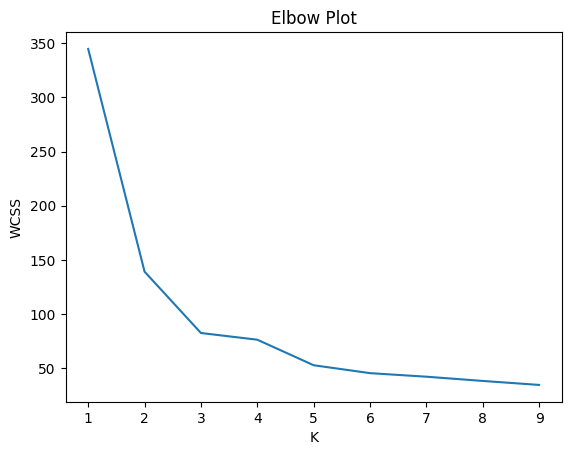

In [148]:
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(k_rng,wcss)
plt.title('Elbow Plot')

We can see that K=3 from the Elbow plot.

<h4 style='color:purple'>Silhouette Coefficient</h4>

We can use the silhouette score to evaluate the quality of clustering. The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better clustering.

In [149]:
from sklearn.metrics import silhouette_score
s= []
k_rng=range(2,11)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km_pred=km.fit_predict(X_train)
    s.append(silhouette_score(X_train, km_pred))

s

[0.5611306577654476,
 0.4484288210592481,
 0.385182516852285,
 0.3668521674534229,
 0.3489021895220016,
 0.3199834686107301,
 0.2966773658860883,
 0.2979331426481597,
 0.32792437635337285]

Text(0.5, 1.0, 'Silhouette Score vs. Number of Clusters')

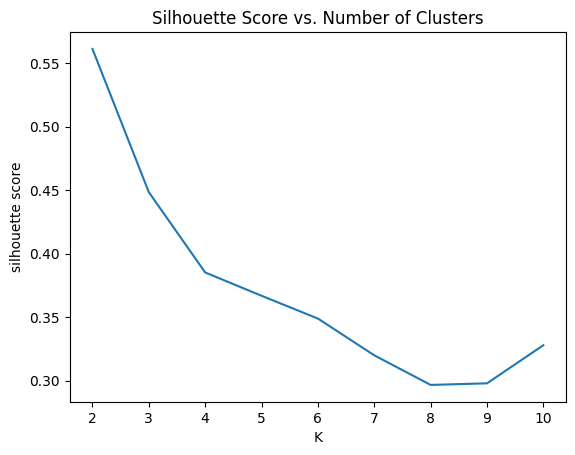

In [150]:
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.plot(k_rng,s)
plt.title('Silhouette Score vs. Number of Clusters')

## 2.Heirarchical Clustering

In [ ]:
# Dendrogram plot
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Calculate linkage using Ward's method and create the dendrogram
dendro = shc.dendrogram(shc.linkage(X_train, method="ward"))

plt.title("Dendrogram Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("features")
plt.show()


In [ ]:
dendro = shc.dendrogram(shc.linkage(X_train, method="ward"))
plt.hlines(y=1.5,xmin=0,xmax=500,lw=3,linestyles='--')
plt.text(x=20,y=1.6,s='Horizontal line crossing 3 vertical lines')
plt.title("Dendrogram Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("features")
plt.show()
